In [7]:
from glob import glob

import trimesh
import numpy as np
from scipy.interpolate import griddata

#zi = griddata((x,y),z,(xi,yi),method='linear')

In [34]:
def appendSpherical_np(xyz):
    ptsnew = np.hstack((xyz, np.zeros(xyz.shape)))
    xy = xyz[:,0]**2 + xyz[:,1]**2
    ptsnew[:,3] = np.sqrt(xy + xyz[:,2]**2) #range
    #ptsnew[:,4] = np.arctan2(np.sqrt(xy), xyz[:,2]) # for elevation angle defined from Z-axis down
    ptsnew[:,4] = np.arctan2(xyz[:,2], np.sqrt(xy)) # for elevation angle defined from XY-plane up
    ptsnew[:,5] = np.arctan2(xyz[:,1], xyz[:,0]) #azimuth
    return ptsnew

In [35]:
#steps

#0 calculate centroid and recentre hail at centroid
#?? align to dmax
#1 convert vertices into spherical coordiantes
#2 interpolate onto regular grid
#3 plot

In [44]:
stl_ffn = '/home/meso/data/yalboroo_collection/hailstone09.stl'
# load mesh
mymesh = trimesh.load_mesh(stl_ffn)
# volumetric center of mass which we can set as the origin for our mesh
mymesh.vertices -= mymesh.center_mass
# convert to spherical
ptsnew = appendSpherical_np(mymesh.vertices)
mymesh_azi = np.rad2deg(ptsnew[:,5])
mymesh_elv = np.rad2deg(ptsnew[:,4])
mymesh_rng = ptsnew[:,3]

# interpolate
xi, yi = np.meshgrid(np.arange(-180,180), np.arange(-90,90)) #azimuth, elevation

zi = griddata((mymesh_azi, mymesh_elv), mymesh_rng, (xi,yi), method='linear')

Text(0, 0.5, 'elevation from x-y plane')

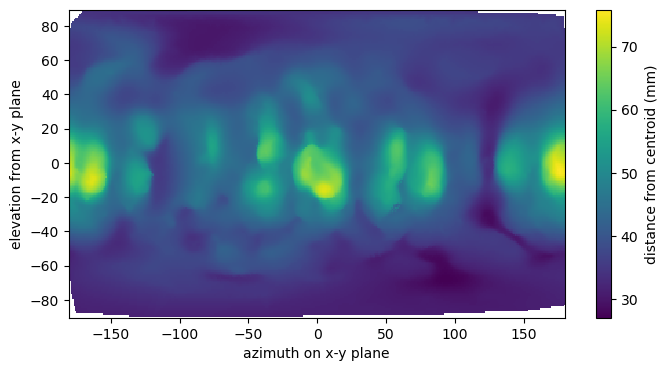

In [57]:
from matplotlib import pyplot as plt
plt.figure(figsize=[8,4])
plt.pcolor(xi, yi, zi)
plt.colorbar(label='distance from centroid (mm)')
plt.xlabel('azimuth on x-y plane')
plt.ylabel('elevation from x-y plane')

In [59]:
scene = trimesh.Scene(mymesh)
scene.show()